# Linear Regression

* Linearity
* Independence
* Normality

Para un conjunto de puntos ${x_i}$ tenemos el modelo lineal 
\begin{equation}
 \hat{y}_i = a_0 + a_1 x_i
\end{equation}

definimos el error asociado al ajuste del modelo lineal como $Res = |y_i - \hat{y_i}|$. Donde el modelo de regresion lineal se obtiene a partir de minimizar la suma de los residuos al cuadrado $\sum Res² = \sum |y_i - \hat{y_i}|^2$


#### Evaluating Linear regression model 
* Mean Absolut Error (MAE)
\begin{equation}
MAE = \sum \frac{|y_i - \hat{y_i}|}{N}
\end{equation}

* Mean Squared Error (MSE)
\begin{equation}
MSE = \sum \frac{|y_i - \hat{y_i}|^2}{N}
\end{equation}


* Root Mean Squared Error (RMSE)
\begin{equation}
RMSE = \sqrt{\sum \frac{|y_i - \hat{y_i}|^2}{N}}
\end{equation}

* Coefficient of determination $R^2$

\begin{equation}
R^2 = 1 - \frac{RSS}{TSS}
\end{equation}

donde $RSS = \sum |y_i - \hat{y_i}|^2$ y $TSS = \sum (y_i - \bar{y})^2
$


In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler
import copy
import seaborn as sbn
import tensorflow as tf
from sklearn.linear_model import LinearRegression


2025-10-07 12:33:14.743371: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-10-07 12:33:14.749788: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-10-07 12:33:15.533754: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-10-07 12:33:19.827549: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To tur

In [3]:
dataset_cols = ['bike_count','hour','temp','humidity','wind_speed','visibility','dew_point_temp','Solar_Rad','Rain','snow','functional']

df = pd.read_csv("SeoulBikeData.csv", encoding='latin1').drop(['Date', 'Holiday', 'Seasons'], axis=1)
df.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Functioning Day
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Yes
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Yes
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Yes
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Yes
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Yes


In [4]:
df.columns = dataset_cols
df['functional'] = df['functional'].map({'Yes': 1, 'No': 0})
df = df[df['hour'] == 12]
df = df.drop(['hour'], axis=1)

In [5]:
df.head()


,bike_count,temp,humidity,wind_speed,visibility,dew_point_temp,Solar_Rad,Rain,snow,functional
12,449,1.7,23,1.4,2000,-17.2,1.11,0.0,0.0,1
36,479,4.3,41,1.3,1666,-7.8,1.09,0.0,0.0,1
60,333,5.8,85,1.7,349,3.4,0.43,0.0,0.0,1
84,393,-0.3,38,4.8,1823,-12.9,1.11,0.0,0.0,1
108,321,-2.3,25,0.0,1962,-19.7,0.00,0.0,0.0,1


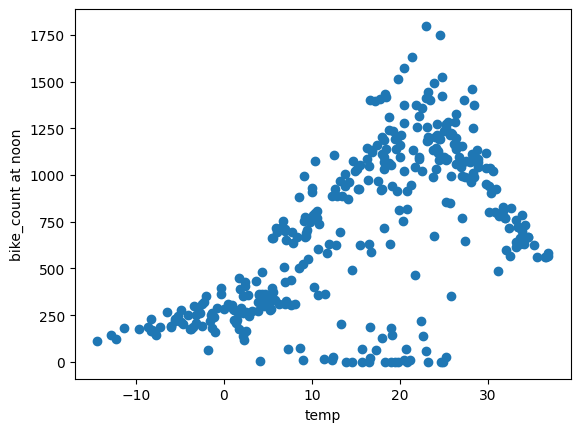

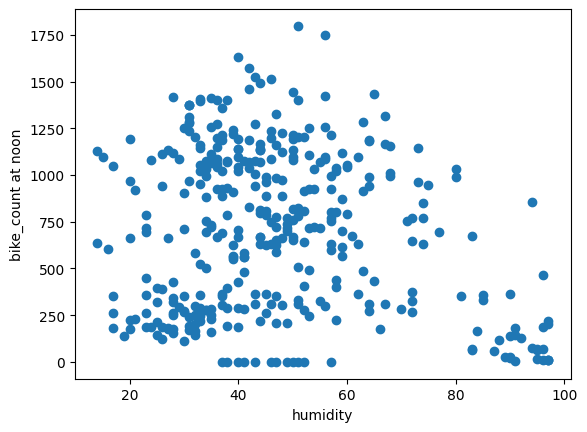

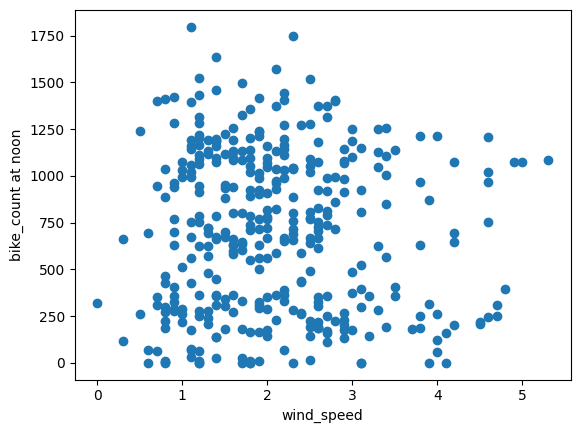

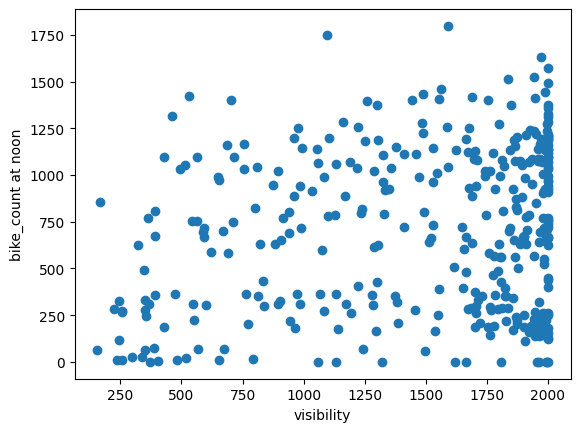

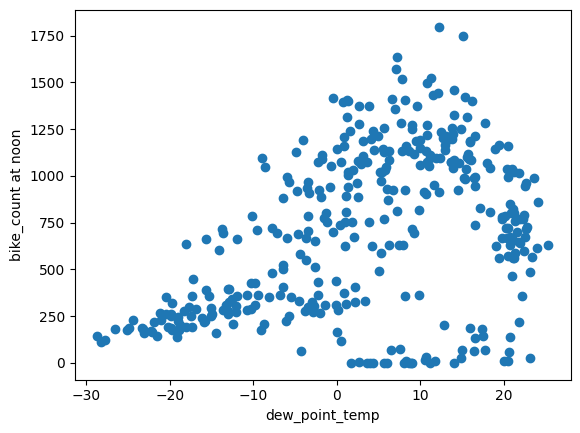

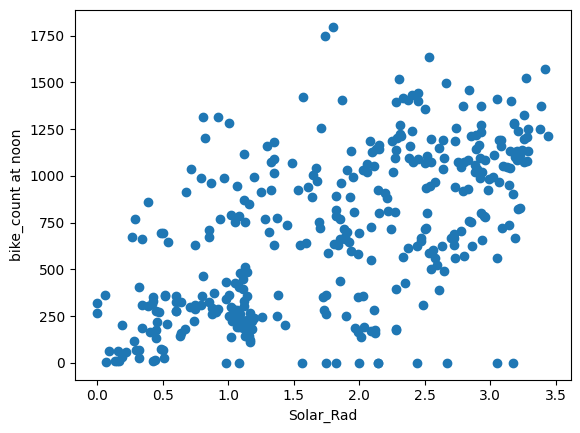

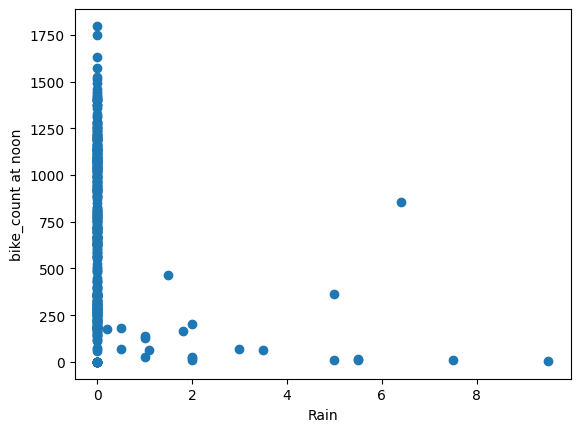

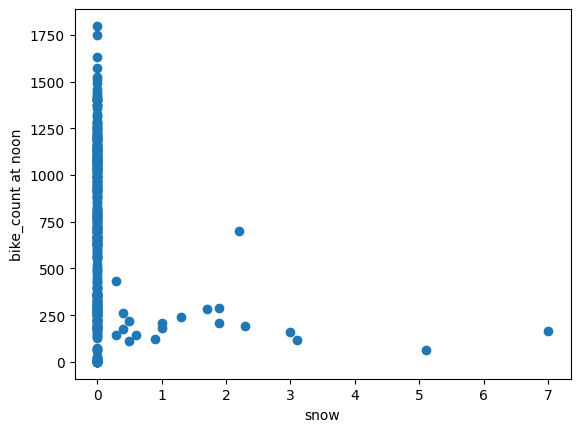

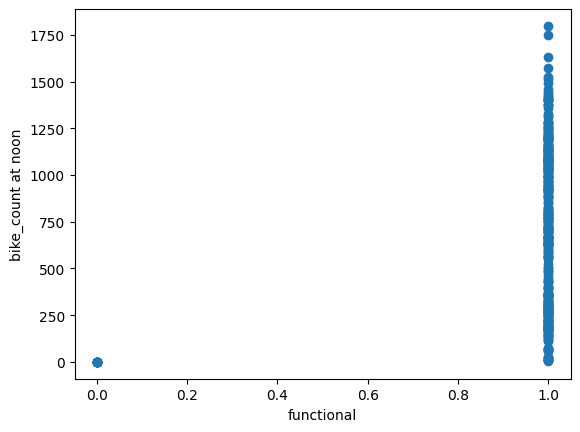

In [6]:
for label in df.columns[1:]:
    plt.scatter(df[label], df['bike_count'])
    plt.xlabel(label)
    plt.ylabel('bike_count at noon')
    plt.show()


In [7]:
df = df.drop(['wind_speed', 'visibility', 'functional'], axis=1)

In [8]:
df.head()


,bike_count,temp,humidity,dew_point_temp,Solar_Rad,Rain,snow
12,449,1.7,23,-17.2,1.11,0.0,0.0
36,479,4.3,41,-7.8,1.09,0.0,0.0
60,333,5.8,85,3.4,0.43,0.0,0.0
84,393,-0.3,38,-12.9,1.11,0.0,0.0
108,321,-2.3,25,-19.7,0.00,0.0,0.0


# Train/valid/test Dataset

In [9]:
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

/home/juancarlos/.local/lib/python3.13/site-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [28]:
def get_xy(dataframe, y_label, x_labels=None):
    dataframe = copy.deepcopy(dataframe)
    if x_labels is None:
        X = dataframe[[c for c in dataframe.columns if c!=y_label]].values
    else:
        if len(x_labels) == 1:
            X = dataframe[x_labels[0]].values.reshape(-1,1)
        else:
            X = dataframe[x_labels].values
    
    y = dataframe[y_label].values.reshape(-1,1)
    data = np.hstack((X,y))
    return data, X, y

In [11]:
_, X_train_temp, y_train_temp = get_xy(train, 'bike_count', x_labels=['temp'])
_, X_valid_temp, y_valid_temp = get_xy(valid, 'bike_count', x_labels=['temp'])
_, X_test_temp, y_test_temp = get_xy(test, 'bike_count', x_labels=['temp'])

In [12]:
temp_reg = LinearRegression()
temp_reg.fit(X_train_temp, y_train_temp)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [14]:
print(temp_reg.coef_, temp_reg.intercept_)

[[20.59012515]] [374.88296912]


In [16]:
temp_reg.score(X_test_temp, y_test_temp)

0.31425270440844666

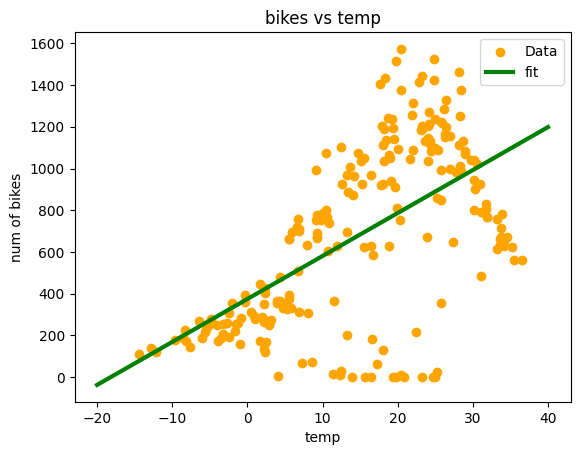

In [18]:
plt.scatter(X_train_temp, y_train_temp, label='Data', color='orange')
x = np.linspace(-20, 40, 100)
plt.plot(x, temp_reg.predict(np.array(x).reshape(-1,1)), label='fit', color='green', linewidth=3)
plt.legend()
plt.title('bikes vs temp')
plt.ylabel('num of bikes')
plt.xlabel('temp')
plt.show()

# Multiple Linear Regression

In [20]:
df.columns


Index(['bike_count', 'temp', 'humidity', 'dew_point_temp', 'Solar_Rad', 'Rain',
       'snow'],
      dtype='object')

In [52]:
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])
_, X_train_all, y_train_all = get_xy(train, 'bike_count', x_labels=df.columns[1:])
_, X_valid_all, y_valid_all = get_xy(valid, 'bike_count', x_labels=df.columns[1:])
_, X_test_all, y_test_all = get_xy(test, 'bike_count', x_labels=df.columns[1:])

/home/juancarlos/.local/lib/python3.13/site-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [35]:
all_reg = LinearRegression()
all_reg.fit(X_train_all, y_train_all)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [34]:
all_reg.score(X_test_all, y_test_all)

0.2126704122678098

# Regression with a Neural Net

In [61]:
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])
_, X_train_temp, y_train_temp = get_xy(train, 'bike_count', x_labels=['temp'])
_, X_valid_temp, y_valid_temp = get_xy(valid, 'bike_count', x_labels=['temp'])
_, X_test_temp, y_test_temp = get_xy(test, 'bike_count', x_labels=['temp'])

/home/juancarlos/.local/lib/python3.13/site-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [62]:
temp_normalizer = tf.keras.layers.Normalization(input_shape=(1,), axis=None)
temp_normalizer.adapt(X_train_temp.reshape(-1))

/home/juancarlos/.local/lib/python3.13/site-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [63]:
temp_nn_model = tf.keras.Sequential(
    [
        temp_normalizer, 
        tf.keras.layers.Dense(1)
    ]
)

In [73]:
temp_nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 0.1), loss = 'mean_squared_error')

In [71]:
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.xlabel('Epoch')
    plt.ylabel('')
    plt.grid()
    plt.legend()
    plt.show()

In [74]:
history = temp_nn_model.fit(
    X_train_temp.reshape(-1), y_train_temp,
    verbose = 0,
    epochs = 1000,
    validation_data = (X_valid_temp, y_valid_temp)
)

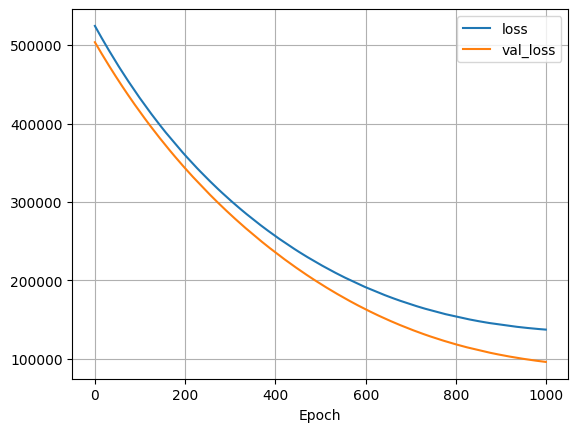

In [75]:
plot_loss(history)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


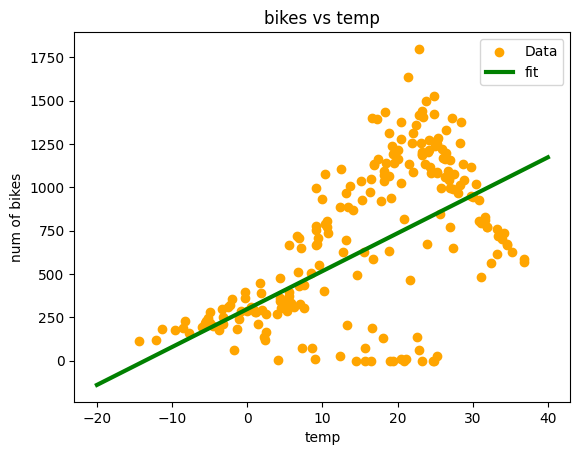

In [77]:
plt.scatter(X_train_temp, y_train_temp, label='Data', color='orange')
x = np.linspace(-20, 40, 100)
plt.plot(x, temp_nn_model.predict(np.array(x).reshape(-1,1)), label='fit', color='green', linewidth=3)
plt.legend()
plt.title('bikes vs temp')
plt.ylabel('num of bikes')
plt.xlabel('temp')
plt.show()

In [78]:
temp_nn_model.predict(np.array(x).reshape(-1,1))

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


array([[-140.76147  ],
       [-127.49634  ],
       [-114.23108  ],
       [-100.96594  ],
       [ -87.700806 ],
       [ -74.43555  ],
       [ -61.17041  ],
       [ -47.905212 ],
       [ -34.640015 ],
       [ -21.374878 ],
       [  -8.109741 ],
       [   5.1555176],
       [  18.420715 ],
       [  31.685913 ],
       [  44.95105  ],
       [  58.216248 ],
       [  71.481445 ],
       [  84.74658  ],
       [  98.01178  ],
       [ 111.27704  ],
       [ 124.542175 ],
       [ 137.80734  ],
       [ 151.07251  ],
       [ 164.33768  ],
       [ 177.60287  ],
       [ 190.86807  ],
       [ 204.13327  ],
       [ 217.39844  ],
       [ 230.6636   ],
       [ 243.9288   ],
       [ 257.194    ],
       [ 270.45917  ],
       [ 283.72433  ],
       [ 296.98953  ],
       [ 310.25473  ],
       [ 323.5199   ],
       [ 336.78506  ],
       [ 350.0503   ],
       [ 363.31543  ],
       [ 376.58063  ],
       [ 389.84583  ],
       [ 403.111    ],
       [ 416.37616  ],
       [ 42

# Neural Net

In [92]:
temp_normalizer = tf.keras.layers.Normalization(input_shape=(1,), axis=None)
temp_normalizer.adapt(X_train_temp.reshape(-1))

nn_model = tf.keras.Sequential(
    [
        temp_normalizer, 
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(1),
    ]
)

nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 0.001), loss = 'mean_squared_error')

/home/juancarlos/.local/lib/python3.13/site-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


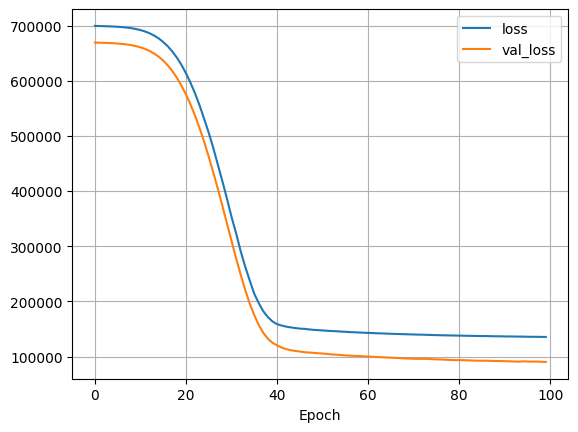

In [93]:
history = nn_model.fit(
    X_train_temp, y_train_temp,
    verbose = 0,
    epochs = 100,
    validation_data = (X_valid_temp, y_valid_temp)
)
plot_loss(history)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


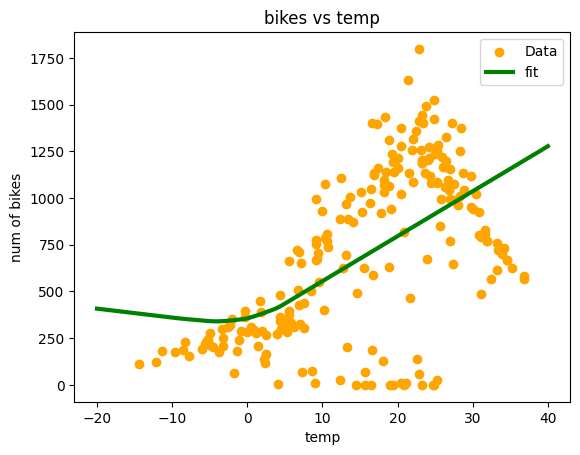

In [94]:
plt.scatter(X_train_temp, y_train_temp, label='Data', color='orange')
x = np.linspace(-20, 40, 100)
plt.plot(x, nn_model.predict(np.array(x).reshape(-1,1)), label='fit', color='green', linewidth=3)
plt.legend()
plt.title('bikes vs temp')
plt.ylabel('num of bikes')
plt.xlabel('temp')
plt.show()